In [16]:
import sys
sys.path.insert(0,'../src')
sys.path.insert(0,'../data')
sys.path.insert(0,'../upload_data')
sys.path.insert(0,'../config')
sys.path.insert(0,'..')
import geopandas as gpd
import pandas as pd
import geoplot as gplt
import geoplot.crs as gcrs
import matplotlib.pyplot as plt
import etl
import json
import cleaning
import datetime
from heatmaps import *
import matplotlib.colors as colors
from get_date_range_df import *

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%reload_ext autoreload

In [4]:
fp_2017 = '../data/raw/STOPS_2017.csv'
test_2017 = cleaning.clean_2017(fp_2017)
test_2017.head()

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3254: DtypeWarning: Columns (5,7,8,15,16,17) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


,stop_id,stop_cause,service_area,subject_race,subject_sex,subject_age,date_stop,time_stop,arrested,searched,obtained_consent,contraband_found,property_seized
0,1444799,Moving Violation,120,Native American,Male,37.0,2017-01-01,00:03:00,N,N,NaN,N,N
1,1444867,Equipment Violation,120,White,Male,24.0,2017-01-01,19:15:00,N,N,NaN,N,N
2,1444871,Equipment Violation,310,Other,Male,32.0,2017-01-01,19:10:00,N,N,NaN,N,N
3,1444869,Moving Violation,620,White,Male,31.0,2017-01-01,19:10:00,N,N,NaN,N,N
4,1444888,Moving Violation,710,Hispanic/Latino/a,Female,67.0,2017-01-01,18:50:00,N,N,NaN,N,N


In [5]:
fp_2018 = '../data/raw/STOPS_2018-2019.csv'
test_2018 = cleaning.clean_2018_2019(fp_2018)
test_2018.head()

URLError: <urlopen error [Errno 8] nodename nor servname provided, or not known>

In [ ]:
areas = make_areas()
areas

In [ ]:
make_proportions(test,'Asian','2018-07-01','2018-10-15')

In [29]:
from dateutil.relativedelta import relativedelta

In [33]:
def make_heat(df,race,event,start_date,end_date):
    areas = make_areas()
    props = make_proportions(df,race,start_date,end_date)
    heat = areas.merge(props, left_on='serv',right_index=True, how='outer')
    heat = heat.dissolve(by='serv',aggfunc='first').fillna(0).drop(0)
    event_y = (datetime.date.fromisoformat(start_date) + relativedelta(months = 2)).year
    fig, ax = plt.subplots(1, figsize=(10,10))
    ax.axis('off')
    ax.set_title(f'Proportion of {race} Drivers Stopped By Service Area\n Event: {event} ({event_y})'.format(race,event,event_y), fontdict={'fontsize':'15','fontweight' : '3'})
    sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=0, vmax=heat.prop.max()))
    fig.colorbar(sm)
    heat.plot(column='prop', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

2018

In [68]:
cdict = {'red':  ((0.0, 0.0, 0.0),   # no red at 0
                  (0.5, 1.0, 1.0),   # all channels set to 1.0 at 0.5 to create white
                  (1.0, 0.8, 0.8)),  # set to 0.8 so its not too bright at 1

        'green': ((0.0, 0.8, 0.8),   # set to 0.8 so its not too bright at 0
                  (0.5, 1.0, 1.0),   # all channels set to 1.0 at 0.5 to create white
                  (1.0, 0.0, 0.0)),  # no green at 1

        'blue':  ((0.0, 0.0, 0.0),   # no blue at 0
                  (0.5, 1.0, 1.0),   # all channels set to 1.0 at 0.5 to create white
                  (1.0, 0.0, 0.0))   # no blue at 1
       }

# Create the colormap using the dictionary
GnRd = colors.LinearSegmentedColormap('GnRd', cdict)

In [90]:
def make_difference_heatmap(df_current,df_prior,race,event,start_date,end_date):
    areas = make_areas()
    prior_start_date = (datetime.date.fromisoformat(start_date)-relativedelta(years=1)).isoformat()
    prior_end_date = (datetime.date.fromisoformat(end_date)-relativedelta(years=1)).isoformat()
    props_post = make_proportions(df_current,race,start_date,end_date)
    props_pre = make_proportions(df_prior,race,prior_start_date,prior_end_date)
    differences = props_post.subtract(props_pre)
    heat_diff = areas.merge(differences, left_on='serv',right_index=True, how='outer')
    heat_diff = heat_diff.dissolve(by='serv',aggfunc='first').fillna(0).drop(0)
    event_y = (datetime.date.fromisoformat(start_date) + relativedelta(months = 2)).year
    fig, ax = plt.subplots(1, figsize=(10,10))
    ax.axis('off')
    ax.set_title(f'Proportion of {race} Drivers Stopped By Service Area\n Event: {event} ({event_y})'.format(race,event,event_y), fontdict={'fontsize':'15','fontweight' : '3'})
    sm = plt.cm.ScalarMappable(cmap='RdYlGn', norm=plt.Normalize(vmin=-1, vmax=1))
    fig.colorbar(sm)
    heat_diff.plot(column='prop', cmap='RdYlGn', linewidth=0.8, ax=ax, edgecolor='0.8')
    return heat_diff


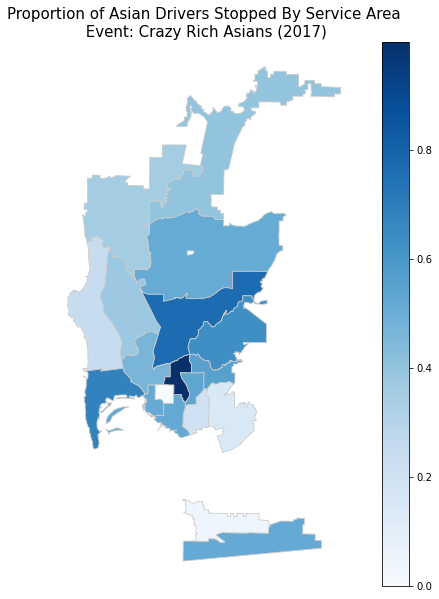

In [6]:
make_heat(test_2017,'Asian','Crazy Rich Asians','2017-07-01','2017-10-15',save_fig=True)

,geometry,prop
serv,,
110,"POLYGON ((6279253.112 1884255.837, 6279262.023...",-0.112626
120,"POLYGON ((6252987.541 1857451.641, 6252282.413...",0.020229
230,"POLYGON ((6305786.455 1931764.390, 6305786.467...",-0.208803
240,"POLYGON ((6291971.520 1887674.568, 6291757.788...",-0.173359
310,"POLYGON ((6296145.895 1867575.086, 6296105.935...",-0.076739
320,"POLYGON ((6316141.200 1862937.460, 6316142.727...",-0.127456
430,"POLYGON ((6317292.625 1824640.012, 6317192.369...",-0.029056
440,"POLYGON ((6299388.999 1831529.000, 6299388.000...",0.077831
510,"MULTIPOLYGON (((6266866.000 1831771.472, 62668...",-0.295540


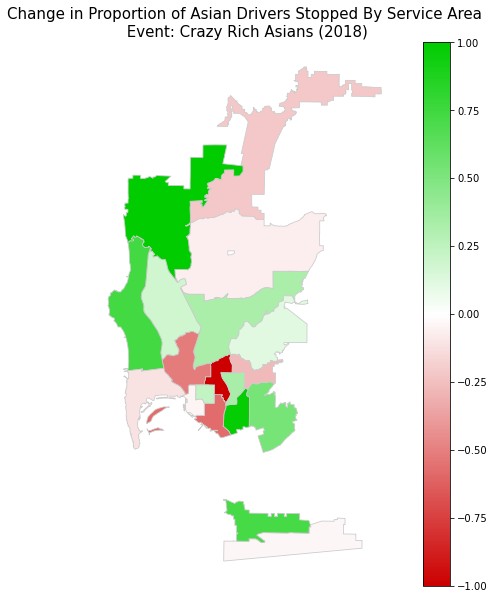

In [7]:
make_difference_heatmap(test_2018,test_2017,'Asian','Crazy Rich Asians','2018-07-01','2018-10-15',save_fig=True)

In [36]:
test_2017

,stop_id,stop_cause,service_area,subject_race,subject_sex,subject_age,date_stop,time_stop,arrested,searched,obtained_consent,contraband_found,property_seized
0,1444799,Moving Violation,120,Native American,Male,37.0,2017-01-01,00:03:00,N,N,NaN,N,N
1,1444867,Equipment Violation,120,White,Male,24.0,2017-01-01,19:15:00,N,N,NaN,N,N
2,1444871,Equipment Violation,310,Other,Male,32.0,2017-01-01,19:10:00,N,N,NaN,N,N
3,1444869,Moving Violation,620,White,Male,31.0,2017-01-01,19:10:00,N,N,NaN,N,N
4,1444888,Moving Violation,710,Hispanic/Latino/a,Female,67.0,2017-01-01,18:50:00,N,N,NaN,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
137690,1619683,Moving Violation,610,White,Female,43.0,NaN,NaN,N,N,NaN,N,N
137691,1620010,Moving Violation,720,Hispanic/Latino/a,Male,27.0,NaN,NaN,N,N,NaN,N,N
137692,1620015,Moving Violation,810,White,Male,31.0,NaN,NaN,N,N,NaN,N,N
137693,1620007,Moving Violation,710,Hispanic/Latino/a,Male,56.0,NaN,NaN,N,N,NaN,N,N


In [57]:
test_2015

,stop_id,stop_cause,service_area,subject_race,subject_sex,subject_age,date_stop,time_stop,arrested,searched,obtained_consent,contraband_found,property_seized
0,1191287,Moving Violation,430,White,Female,NaN,2015-01-01,NaN,N,N,NaN,N,N
1,1191295,Moving Violation,520,Black/African American,Male,NaN,2015-01-01,NaN,N,N,NaN,N,N
2,1191275,Moving Violation,430,Black/African American,Male,NaN,2015-01-01,NaN,N,N,NaN,N,N
3,1191308,Moving Violation,520,White,Male,NaN,2015-01-01,NaN,N,N,NaN,N,N
4,1191285,Moving Violation,430,White,Female,NaN,2015-01-01,NaN,N,N,NaN,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115417,1308165,Moving Violation,Unknown,Hispanic/Latino/a,Female,38.0,2015-12-31,23:39,N,N,NaN,N,N
115418,1308166,Equipment Violation,930,White,Male,18.0,2015-12-31,23:40,N,N,NaN,N,N
115419,1308168,Moving Violation,520,Black/African American,Male,38.0,2015-12-31,23:52,N,N,NaN,N,N
115420,1308169,Equipment Violation,830,Black/African American,Female,33.0,2015-12-31,23:54,N,N,NaN,N,N


In [6]:
fp_2016 = '../data/raw/STOPS_2016.csv'
test_2016 = cleaning.clean_2014_2016(fp_2016)
fp_2015 = '../data/raw/STOPS_2015.csv'
test_2015 = cleaning.clean_2014_2016(fp_2015)
fp_2014 = '../data/raw/STOPS_2014.csv'
test_2014 = cleaning.clean_2014_2016(fp_2014)

(None,
                                                geometry      prop
 serv                                                             
 110   POLYGON ((6279253.112 1884255.837, 6279262.023... -0.001465
 120   POLYGON ((6252987.541 1857451.641, 6252282.413...  0.047719
 230   POLYGON ((6305786.455 1931764.390, 6305786.467...  0.031804
 240   POLYGON ((6291971.520 1887674.568, 6291757.788... -0.013301
 310   POLYGON ((6296145.895 1867575.086, 6296105.935...  0.148215
 320   POLYGON ((6316141.200 1862937.460, 6316142.727... -0.209757
 430   POLYGON ((6317292.625 1824640.012, 6317192.369...  0.013119
 440   POLYGON ((6299388.999 1831529.000, 6299388.000... -0.035836
 510   MULTIPOLYGON (((6266866.000 1831771.472, 62668... -0.244646
 520   POLYGON ((6283949.000 1837581.000, 6283944.103...  0.096868
 530   POLYGON ((6287304.000 1850636.000, 6287303.000... -0.185001
 610   POLYGON ((6260990.000 1844030.000, 6260974.350... -0.475776
 620   POLYGON ((6279073.000 1850533.000, 6279073.338..

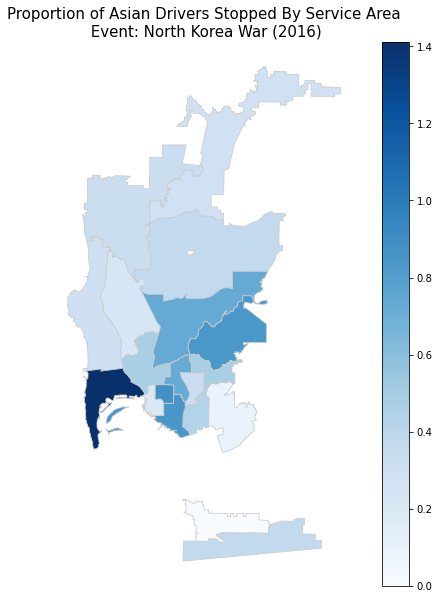

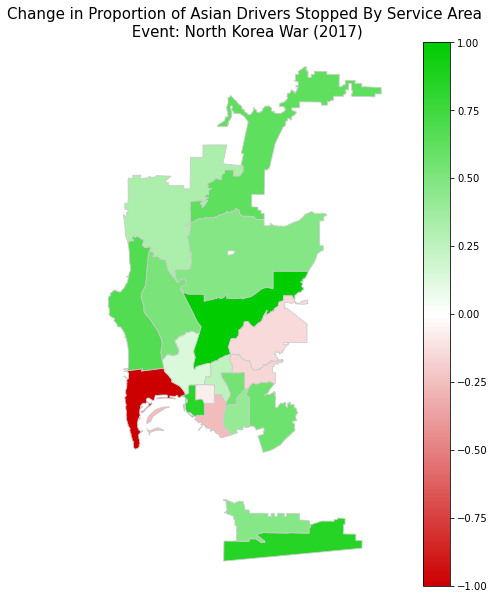

In [8]:
(make_heat(test_2016,'Asian','North Korea War','2016-02-01','2016-06-01',save_fig=False),
 make_difference_heatmap(test_2017,test_2016,
                         'Asian','North Korea War','2017-02-01','2017-06-01',save_fig=False))




In [29]:
(make_heat(test_2016,'Asian','North Korea War','2016-02-01','2016-06-01',save_fig=False),
 make_difference_heatmap(test_2017,test_2016,
                         'Asian','North Korea War','2017-02-01','2017-06-01',save_fig=False))

DriverError: Unable to open ../upload_data/pd_beats_datasd.shx or ../upload_data/pd_beats_datasd.SHX. Set SHAPE_RESTORE_SHX config option to YES to restore or create it.

In [33]:
!which fiona

In [30]:
(make_heat(test_2015,'Black/African American','Ray Rice','2015-07-08','2015-11-08',save_fig=True),
 make_difference_heatmap(test_2014,test_2015,'Black/African American','Ray Rice','2014-07-28','2014-11-28',save_fig=True))
    

DriverError: Unable to open ../upload_data/pd_beats_datasd.shx or ../upload_data/pd_beats_datasd.SHX. Set SHAPE_RESTORE_SHX config option to YES to restore or create it.

In [80]:
make_num(test_2015,'Black/African American','2015-7-28','2015-11-28')

,stop_id,stop_cause,service_area,subject_race,subject_sex,subject_age,date_stop,time_stop,arrested,searched,obtained_consent,contraband_found,property_seized


In [79]:
test_2015[[(pd.to_datetime(x) >= pd.to_datetime('2015-7-28')) & (pd.to_datetime(x) <= pd.to_datetime('2015-11-28')) for x in test_2015.date_stop]]

,stop_id,stop_cause,service_area,subject_race,subject_sex,subject_age,date_stop,time_stop,arrested,searched,obtained_consent,contraband_found,property_seized
70045,1263015,Moving Violation,520,Hispanic/Latino/a,Male,73.0,2015-07-28,3:45,N,N,NaN,N,N
70046,1263010,Moving Violation,440,Hispanic/Latino/a,Male,22.0,2015-07-28,4:55,Y,Y,NaN,N,N
70047,1263013,Moving Violation,520,White,Male,46.0,2015-07-28,9:10,N,N,NaN,N,N
70048,1263012,Moving Violation,430,Black/African American,Male,31.0,2015-07-28,9:20,N,N,NaN,N,N
70049,1263002,Moving Violation,520,White,Female,42.0,2015-07-28,9:25,N,N,NaN,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106087,1298635,"Suspect Info (I.S., Bulletin, Log)",520,Hispanic/Latino/a,Male,26.0,2015-11-28,23:20,N,N,NaN,N,N
106088,1298633,Equipment Violation,830,Hispanic/Latino/a,Female,24.0,2015-11-28,23:30,N,N,N,N,N
106089,1299732,Moving Violation,520,White,Male,18.0,2015-11-28,23:30,N,N,NaN,N,N
106090,1298631,Moving Violation,230,White,Female,50.0,2015-11-28,23:35,N,N,NaN,N,N


In [73]:
test_2015

,stop_id,stop_cause,service_area,subject_race,subject_sex,subject_age,date_stop,time_stop,arrested,searched,obtained_consent,contraband_found,property_seized
0,1191287,Moving Violation,430,White,Female,NaN,2015-01-01,NaN,N,N,NaN,N,N
1,1191295,Moving Violation,520,Black/African American,Male,NaN,2015-01-01,NaN,N,N,NaN,N,N
2,1191275,Moving Violation,430,Black/African American,Male,NaN,2015-01-01,NaN,N,N,NaN,N,N
3,1191308,Moving Violation,520,White,Male,NaN,2015-01-01,NaN,N,N,NaN,N,N
4,1191285,Moving Violation,430,White,Female,NaN,2015-01-01,NaN,N,N,NaN,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115417,1308165,Moving Violation,Unknown,Hispanic/Latino/a,Female,38.0,2015-12-31,23:39,N,N,NaN,N,N
115418,1308166,Equipment Violation,930,White,Male,18.0,2015-12-31,23:40,N,N,NaN,N,N
115419,1308168,Moving Violation,520,Black/African American,Male,38.0,2015-12-31,23:52,N,N,NaN,N,N
115420,1308169,Equipment Violation,830,Black/African American,Female,33.0,2015-12-31,23:54,N,N,NaN,N,N
